In [3]:
from HotWord import TextsAnalyse
from pymongo import MongoClient
from dateutil import parser
import datetime

C:\MyProgram\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
#数据库连接
client = MongoClient()
db = client['news']

In [5]:
def cal_richness(deltaSize = 7):
    previous = []
    #分析的总时间段
    startTime = datetime.datetime(2018, 6, 1)
    endTime = datetime.datetime(2018, 7, 30)
    #窗口大小
    delta = datetime.timedelta(days=deltaSize)

    total, new = 0, 0
    while startTime < endTime:
#         print("起始时间:%s, 终止时间:%s" % (startTime, startTime + delta))
        #根据时间窗口查询百度新闻数据
        baiduTitleData = db.baiduNews.find(
            { "time" : { "$gte" : startTime, "$lt" : startTime + delta } },
            {"title":1, "_id":0}
        )
        baiduTitles = [each['title'] for each in baiduTitleData]

        #根据时间窗口查询36氪数据
        krTitleData = db.allKr.find(
            { "time" : { "$gte" : startTime, "$lt" : startTime + delta } },
            {"title":1, "_id":0}
        )
        krTitles = [each['title'] for each in krTitleData]

        #数据汇总
        titles = baiduTitles + krTitles

#         print('百度新闻：',len(baiduTitles))
#         print('36氪：', len(krTitles))

        analyser = TextsAnalyse(titles)
#         analyser.show_word_cloud(30)
        keyWords = analyser.get_key_words(30)
        newWords = list(set(keyWords).difference(set(previous)))
        new += len(newWords)
        total += 30
#         print("\nnew words:")
#         print(newWords)
        previous = keyWords
#         print('\n------------------------------------------------------------------------------\n')
        startTime += delta
    return new / total

In [11]:
l = []
for i in range(1,11):
    x = cal_richness(i)
    print(i,x)
    l.append(x)

1 0.7293785310734463
2 0.6455555555555555
3 0.5716666666666667
4 0.48444444444444446
5 0.45555555555555555
6 0.43666666666666665
7 0.4444444444444444
8 0.4375
9 0.4666666666666667
10 0.45


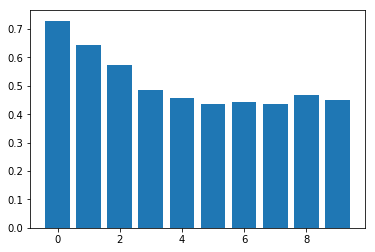

In [12]:
import matplotlib.pyplot as plt

plt.bar(range(len(l)), l)
plt.show()